# シミュレーション

* 全てを扱うわけではないが、次のサイトに基づく
    * [図示とシミュレーション](https://py4basics.github.io/1_Basics_VI.html)

## 始める前に

次のコードを実行しなさい（試験範囲外）。

In [ ]:
# CELL PROVIDED
import piplite
await piplite.install(['py4macro','japanize-matplotlib-jlite'])

次のコードを実行し，それぞれのパッケージやモジュールをインポートしなさい。

In [1]:
# CELL PROVIDED
import matplotlib.pyplot as plt
import random

# 以下は試験範囲外
import japanize_matplotlib_jlite
plt.rcParams['figure.figsize'] = (4, 3)

＜説明＞
* `matplotlib.pyplot`：図示のためのパッケージ`matplotlib`の中にあるモジュール`pyplot`（`plt`として読み込む）
* `random`：ランダム変数や分布に関連するモジュール
* 以下は試験範囲外
    * `japanize_matplotlib_jlite`：`matplotlib`を日本語化するモジュール
    * `plt.rcParams['figure.figsize'] = (5, 3.75)`：表示されるプロットの大きさを指定する。

## 大数の法則

必須科目「統計学」で学んだ。

### 大数の法則とは

母集団（分布型は**不明**）のパラメータを次の様に表記しよう。
* $\mu$：平均

この母集団から標本$X_1,X_2\cdots X_n$を抽出しよう（$n$は標本の大きさ）。これが一組の標本となり，その平均を$\overline{X}_n$とする。

$$
\overline{X}_n=\frac{X_1+X_2+\cdots+X_n}{n}=\frac{\sum_{i=1}^nX_i}{n}
$$

$X_i$，$i=1,2...n$の値はランダムなため，$\overline{X}_n$自体がランダム変数となる。

**＜大数の法則（Law of Large Numbers）＞**<br>
> 母集団の分布がどのようなものであれ（連続型，離散型），$\mu$が有限である限り，$n$が大きくなると$\overline{X}_n$は$\mu$に近づいていく。
>
> $$\lim_{n\rightarrow\infty}\overline{X}_n\;\rightarrow\;\mu$$

＜イメージ＞
* 最初は$n=10$の一組の標本を集めて$\overline{X}_n$を計算をする。$\mu$と大きく異なるだろう。
* 次に$n=100$の別の一組の標本を集めて$\overline{X}_n$を計算をする。まだ，$\mu$と異なるだろう。
* 再度$n=1000$の別の一組の標本を集めて$\overline{X}_n$を計算をする。$\mu$に近づいてる感じがする。
* 標本の大きさ$n$を増やすプロセスを続けると，$\overline{X}_n$は$\mu$に近付いて行く。

### コイントス

* コインの表を`1`，裏を`0`
* `1`と`0`はそれぞれ確率$0.5$で発生する（ベルヌーイ分布）
* 平均：$\mu=0.5\times 1 +0.5\times 0 = 0.5$

この様なランダム変数は既出の次の関数で表すことができる。

In [2]:
random.randint(0,1)

0

* `20`個のコインを同時に投げる場合を考えよう（`1`個のコインを`20`回投げても同じ）。
* `20`が標本の大きさであり，変数`n`（number of coins）に割り当てよう。

In [3]:
n = 20

標本の大きさが`n`の場合のコイントス

In [4]:
toss = [random.randint(0,1) for _ in range(n)]
toss

[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]

`1`（表）が何回発生したかを数えるには，`sum()`関数を使う

In [5]:
head = sum(toss)

平均（表が出た割合）は次のように計算できる。

In [6]:
head / n

0.4

### シミュレーション１

上のコードを関数化しよう。

In [7]:
def calc_average(n):

    toss = [random.randint(0,1) for _ in range(n)]
    head = sum(toss)
    return head / n

引数の数を変えて計算

In [8]:
calc_average(100)

0.48

In [9]:
calc_average(1000)

0.524

In [10]:
calc_average(10_000)

0.4989

In [11]:
calc_average(100_000)

0.50132

In [12]:
calc_average(1_000_000)

0.500371

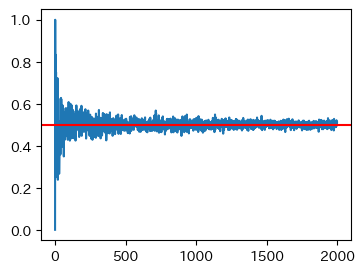

In [13]:
avr_lst = []

for n in range(1,2000):
    res = calc_average(n)
    avr_lst.append(res)

plt.plot(avr_lst)
plt.axhline(0.5, color='red')
pass

### シミュレーション２

上のコードを利用して，`n=2000`回のコイントスをおこなう。そして，`for`ループを使い，各ループで最初の`i`回の結果だけを使い，平均を計算する。
この計算により，次の結果を得ることになる。
* `1`回目のループ：最初の`1`回のコイントスの平均
* `2`回目のループ：最初の`2`回のコイントスの平均
* `.....`
* `1999`回目のループ：最初の`1999`回のコイントスの平均
* 最後のループ：`2000`回のコイントスの平均

`toss`に`2000`回のコイントスの結果を再割り当てする。

In [14]:
n = 2000
toss = [random.randint(0,1) for _ in range(n)]

最初の`10`回の結果を示してみよう。

In [15]:
toss[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

次に，最初の`i`回のコイントスの平均を`mean_lst`に格納する。

In [16]:
mean_lst = []

for i in range(1, n+1):
    
    head = sum(toss[:i])
    res = head / i
    mean_lst.append(res)

`mean_lst`をプロットしてみよう。

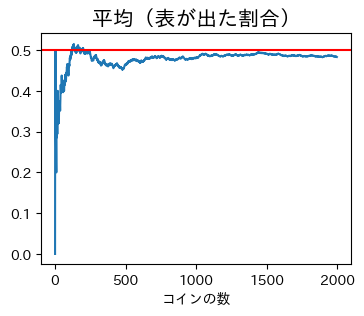

In [17]:
plt.plot(mean_lst)
plt.title('平均（表が出た割合）', size=15)
plt.xlabel('コインの数', size=10)
plt.axhline(0.5, color='red')
pass

ランダム変数なので，必ずしもスムーズに`0.5`に収束しているとは限らないが，この図から標本の大きさ（同時に投げるコインの数）である`n`が増えると，平均は理論値`0.5`に収束することが確認できる（しかし精度は高くない）。

##  中心極限定理

必修科目「統計学」で学んだ。

### 中心極限定理とは

母集団（分布型は**不明**）のパラメータを次の様に表記しよう。
* $\mu$：平均（既知）
* $\sigma$：標準偏差（既知）

この母集団から標本$X_1,X_2\cdots X_n$を抽出し（$n$は標本の大きさ），その平均を$\overline{X}_n$とする。

$$
\overline{X}_n=\frac{X_1+X_2+\cdots+X_n}{n}
$$

標準化した平均を次の様に定義しよう。

$$
Z_n = \frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}}
$$

* $Z_n$は平均`0`，分散`1`となるランダム変数
* $Z_n$の**分布型は不明**

**＜中心極限定理（Central Limit Theorem)＞**<br>
> 母集団の分布がどのようなものであれ（連続型，離散型），$\mu$と$\sigma$が有限である限り，$n$が大きくなると$Z_n$の分布は標準正規分布$N(0,1)$に近づいていく。

下の図は標準正規分布をプロットしている。左右対称のベル型の分布であり，横軸の値は$-\infty$から$\infty$まで全ての実数をカバーしている。

（コードは試験範囲外）

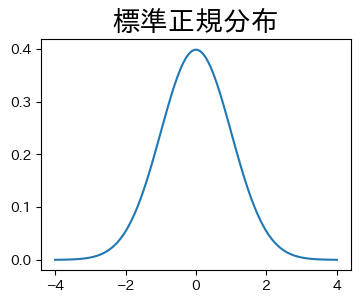

In [18]:
# CELL PROVIDED

def plot_normal():
    
    from scipy.stats import norm
    from py4macro import xvalues
    
    x = xvalues(-4,4,100)
    plt.plot(x, norm.pdf(x,0,1))
    plt.title('標準正規分布', size=20)

plot_normal()

ここでの目的は，シミュレーションを使って中心極限定理を視覚的に理解・確認することである。コイントスの例を使い，次のステップで進める。
1. `n`個のコインを同時に投げることを考え，その標準化平均を計算する。
1. 標準化平均を計算するための関数を作成する。
1. コイントスのシミュレーションをおこない，そのヒストグラムをプロットする。
1. コイントスのヒストグラムと標準正規分布を重ねて表示し，中心極限定理の成立を視覚的に確認する。

### コイントス（再考）

表を`1`，裏を`0`とし，それぞれの確率は$p=0.5$とする。以下が成り立つ。
* 平均：$p=0.5$
* 分散：$p(1-p)=0.5^2$
* 標準偏差：$\sqrt{p(1-p)}=0.5$

`n=20`個のコインを同時に投げる場合，`1`（表）が発生した回数の平均（表の割合）

In [19]:
n = 20
toss = [random.randint(0,1) for _ in range(n)]
head = sum(toss)
head / n

0.65

上の式に従って，この平均を標準化した値を計算する。

In [20]:
(head/n - 0.5) / ( 0.5/n**(1/2) )

1.341640786499874

### 関数化

**同時にトスするコインの数`n`は所与**とするが，関数の中でランダム変数として`1`の数（`h`の数，コインの表の数）が決まり，その標準化平均を返す関数を作成する。

In [21]:
# CELL PROVIDED

"""
引数：
    n：同時にトスするコインの数
戻り値：
    コインの表の平均を標準化した値
"""

'\n引数：\n    n：同時にトスするコインの数\n戻り値：\n    コインの表の平均を標準化した値\n'

In [22]:
def standardized_mean(n):
    
    toss = [random.randint(0,1) for _ in range(n)]
    head = sum(toss)
    
    return ( head/n-0.5) / ( 0.5/n**(1/2) )

`n=20`で実行しよう。

In [23]:
standardized_mean(20)

0.0

この値は`20`個のコインを同時に投げた結果の平均を標準化した値。

`standardized_mean(20)`関数を実行するたびに，次の作業が行われる。
* `20`個のコインが投げられ，その結果が`toss`にリストとして格納される。
* `toss`の表（`1`）の数を合計し，`head`に割り当てる。
* `head`の平均を標準化した値を返す。

`20`個のコインを投げる度に，表（`1`）の数は変化するため，`standardized_mean(20)`を実行するたびに異なる値が返される。

次に，`20`個の同時コイントスを`30`回おこない，毎回標準化平均を計算するとしよう。このシミュレーションの結果は次の内包表記で生成することができる。

In [24]:
[standardized_mean(20) for _ in range(30)]

[1.341640786499874,
 1.341640786499874,
 -1.341640786499874,
 -0.44721359549995787,
 1.7888543819998315,
 0.8944271909999157,
 0.0,
 0.44721359549995837,
 1.341640786499874,
 -0.44721359549995787,
 0.44721359549995837,
 0.8944271909999157,
 0.8944271909999157,
 0.8944271909999157,
 0.0,
 0.8944271909999157,
 1.7888543819998315,
 0.8944271909999157,
 0.0,
 0.8944271909999157,
 1.341640786499874,
 -0.8944271909999157,
 -0.8944271909999157,
 -0.44721359549995787,
 0.8944271909999157,
 0.8944271909999157,
 -1.788854381999832,
 0.0,
 -0.44721359549995787,
 0.44721359549995837]

ランダム変数なので，実行する度に異なる値が並ぶ。また同じ値が複数回発生していることも確認できるだろう。

### ヒストグラム

#### 集合の復習

* `{}`で作成する。
* 重複する要素を削除して返す。

例を考えよう。

In [25]:
{1, 1, 1, 2, 2, 2, 3}

{1, 2, 3}

次にリストの場合を考えよう。

In [26]:
# CELL PROVIDED

lst = [1, 1, 1, 2, 2, 2, 3]
lst

[1, 1, 1, 2, 2, 2, 3]

* `lst`を`{}`の中にそのまま入れてもエラーとなる。
* `lst`の要素を取り出して`{}`に入れる必要ある。
    * `{*lst}`とする。
    * `*`が`lst`の「要素を取り出す」作業をする。

In [27]:
{*lst}

{1, 2, 3}

#### コイントスに戻ろう

例として次の数値を使う。
* 同時に投げるコインの数（標本の大きさ）：`n=1`
* シミュレーションの回数（`n`枚の同時コイントスの回数）：`N=10`（`N`組の標本）

In [28]:
# パラメータの設定
n = 1
N = 10

まず，シミュレーションの結果を変数`toss`に割り当てよう。

In [29]:
toss = [standardized_mean(n) for _ in range(N)]
toss

[-1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0]

`-1`と`1`の２つの値しか発生しない事がわかる。

集合を使って，重複する値を削除してみよう。

In [30]:
{*toss}

{-1.0, 1.0}

重複しない値の数を確認してみよう。

In [31]:
unique = len( {*toss} )
unique

2

ヒストグラムをプロットしてみよう。

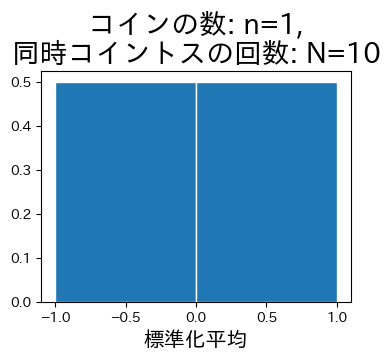

In [32]:
plt.hist(toss,
         bins=unique,
         ec='white',
         density=True)
plt.title(f'コインの数: n={n},\n同時コイントスの回数: N={N}',
          size=20)
plt.xlabel('標準化平均', size=15)
pass

＜注意点＞
* ヒストグラムの柱の幅は階級区間を示すが，シミュレーションの値がそれぞれの区間内で散らばっているのでは**ない**。左の柱にある値は`-1.0`のみであり，右の柱にある値は`1.0`のみである。その２つの数が「標準化平均の唯一の値の数」である。

### プロットの関数化

関数としてまとめよう。

In [33]:
# CELL PROVIDED

"""
引数：
    n：同時にトスするコインの数
    N：試行回数
戻り値：
    None（ヒストグラムが表示される）
"""

'\n引数：\n    n：同時にトスするコインの数\n    N：試行回数\n戻り値：\n    None（ヒストグラムが表示される）\n'

標準化平均の唯一の値の数（x軸）：2


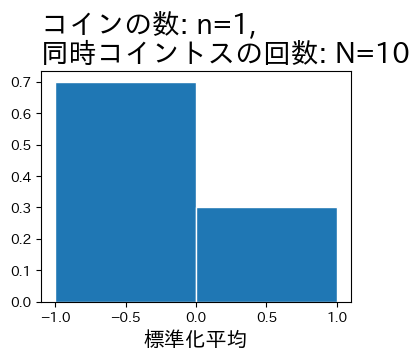

In [34]:
def plot_hist(n, N=10_000):
    """
    引数：
        n：同時にトスするコインの数
        N：試行回数
    戻り値：
        None（ヒストグラムが表示される）"""
    
    # コイントスのシミュレーション
    toss = [standardized_mean(n) for _ in range(N)]

    # 標準化平均の重複しない値の数（棒の数に使う）
    unique = len( {*toss} )
    print(f'標準化平均の唯一の値の数（x軸）：{unique}')

    # ヒストグラム
    plt.hist(toss,
             bins=unique,
             ec='white',
             density=True)
    plt.title(f'コインの数: n={n},\n同時コイントスの回数: N={N}',
              size=20, loc='left')
    plt.xlabel('標準化平均', size=15)
    
    plt.show()  # 図が重なるのを防ぐ
    
plot_hist(1, N=10)

### シミュレーション

これでシミュレーションの準備は整った。`n`（と`N`）の数値を変えてプロットしてみよう。

#### `n=1`の場合

標準化平均の唯一の値の数（x軸）：2


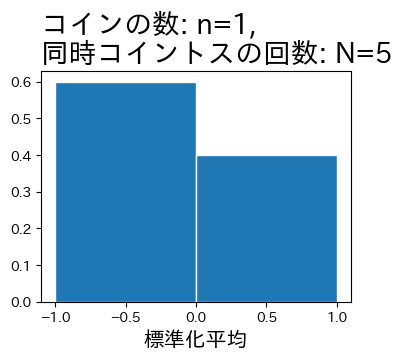

In [35]:
plot_hist(1, 5)

標準化平均の唯一の値の数（x軸）：2


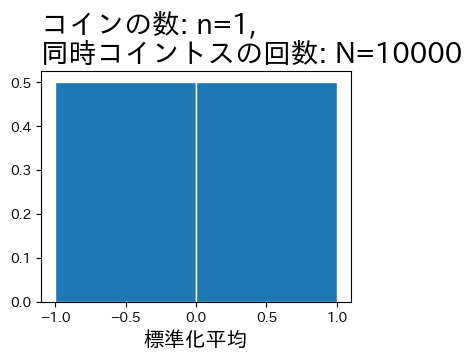

In [36]:
plot_hist(1)

`N`が小さい（`10`）とランダムな影響が強く現れるが，大きくなると（`10000`）大数の法則によって`-1`と`1`の割合は`0.5`に近づいている。一方で，`N`が大きくなっても，分布は標準正規分布とは大きく異なっている。

#### `n=2`の場合

標準化平均の唯一の値の数（x軸）：3


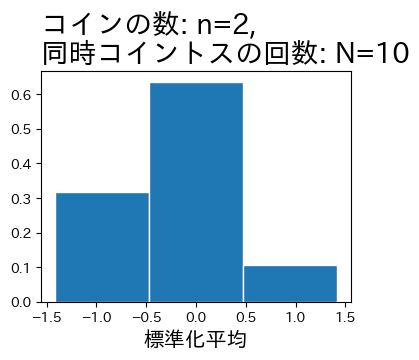

In [37]:
plot_hist(2,10)

標準化平均の唯一の値の数（x軸）：3


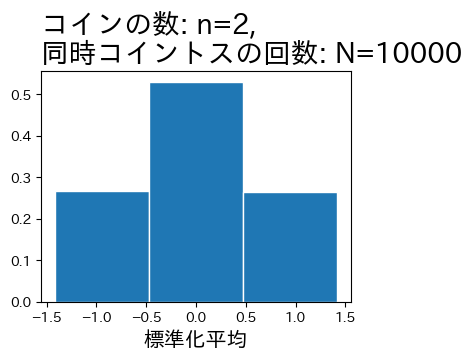

In [38]:
plot_hist(2)

`N`が大きくなると，大数の法則によって左右対称の分布となっている。しかし，依然として標準正規分布とは異なっている。

#### `n=12`の場合

標準化平均の唯一の値の数（x軸）：8


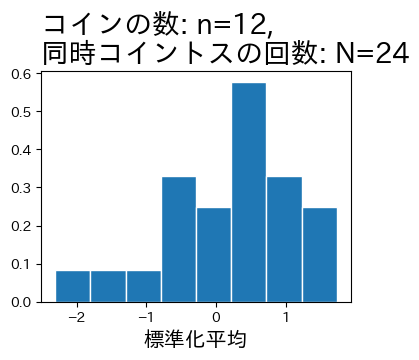

In [39]:
plot_hist(12,24)

標準化平均の唯一の値の数（x軸）：13


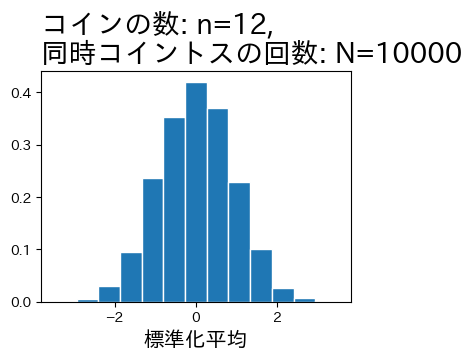

In [40]:
plot_hist(12)

`N`が小さいとランダムな要素が際立ち明確ではないが，`n`増加すると標準正規分布に近づいていることが分かる。

#### `n=64`の場合

標準化平均の唯一の値の数（x軸）：18


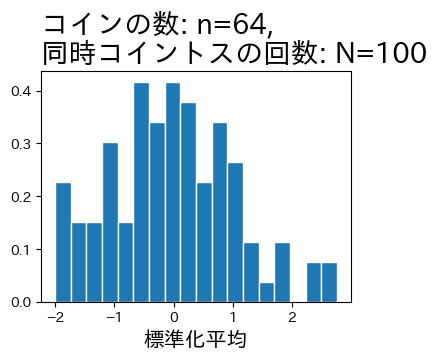

In [41]:
plot_hist(64,100)

標準化平均の唯一の値の数（x軸）：32


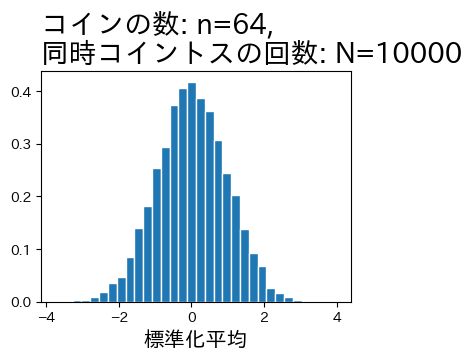

In [42]:
plot_hist(64)

標準正規分布に大きく近づいたことが確認できる。

更に`n`が増加すると，分布は標準正規分布に収束していくことになる。次のコードは`n=1000`と`N=10_000`の下でのヒストグラムと標準正規分布を重ねてプロットしている。標準正規分布の近似としては十分な重なり具合と言っていいだろう。

#### `n=1000`の場合

標準化平均の唯一の値の数（x軸）：111


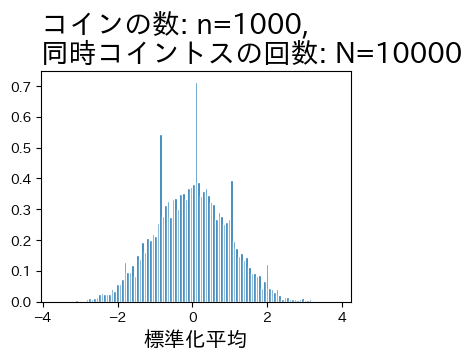

In [43]:
plot_hist(1000)

＜次のコードは試験範囲外＞

標準化平均の重複しない値の数（x軸）：107


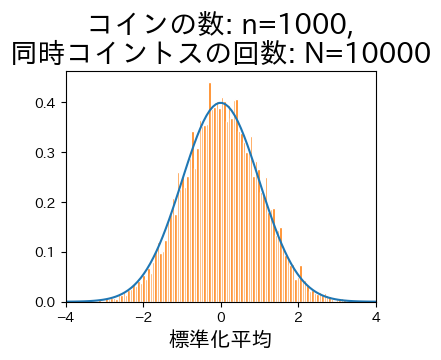

In [44]:
# CELL PROVIDED

def plot_hist_normal(n, N=10_000):
    
    # 標準正規分布 ------------------------------------
    from scipy.stats import norm
    from py4macro import xvalues
    
    x = xvalues(-4,4,100)
    plt.plot(x, norm.pdf(x,0,1))

    # コイントスのシミュレーション -------------------------
    toss = [standardized_mean(n) for _ in range(N)]
    unique = len( set(toss) )
    print(f'標準化平均の重複しない値の数（x軸）：{unique}')
    
    plt.hist(toss,
             bins=sorted({*toss}),     # <--- ここが違う
             ec='white', density=True)
    plt.title(f'コインの数: n={n},\n同時コイントスの回数: N={N}',size=20)
    plt.xlabel('標準化平均', size=15)
    plt.xlim([-4,4])
    plt.show()

plot_hist_normal(1000)